In [1]:
import numpy as np
from scipy import math
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Create & initialize lists for variable values
#time = [t]
#ypos = [y]
#xpos = [x]
#xvel = [vx]
#yvel = [vy]

yvec = []
xvec = []

i = 0
while i <= 4:
    # Set up constant and initial values (SI units)
    t = 0          # initial time
    tf = 10        # final time
    dt = 0.0125     # time step
    y = 0          # initial position, at origin
    x = 0
    v = 14         # initial velocity, in positive-y direction
    th = 45        # Angle of launch
    
    time = [t]
    ypos = [y]
    xpos = [x]

    vx = v*np.cos(2*np.pi*th/360)
    vy = v*np.sin(2*np.pi*th/360)
    xvel = [vx]
    yvel = [vy]
    
    b = 0 + 0.25 * i
    ax = - b*vx
    ay = -9.8 - b*vy   # constant acceleration
    i = i + 1
    while y >= 0:
        # Update variables using Eqs. (1) & (2)
        vy = vy + ay * dt
        vx = vx + ax * dt
        y = y + vy * dt
        x = x + vx * dt
        ax = -b*vx
        ay = -9.8 - b*vy


        # Add updated variables to the lists
        yvel.append(vy)
        xvel.append(vx)
        ypos.append(y)
        xpos.append(x)
    
        # Increment time
        t = t + dt
        time.append(t)
    
    yvec.append(ypos)
    xvec.append(xpos)

In [3]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=14)

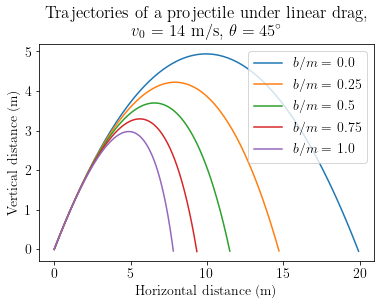

In [4]:
plt.figure()
i = 0
while i < len(xvec):
    plt.plot(xvec[i], yvec[i], label='$b/m =$ ' + str(0 + 0.25*i))
    i = i + 1
plt.title('Trajectories of a projectile under linear drag,\n $v_0$ = 14 m/s, $\\theta = {:2d}^\circ$'.format(th))
plt.xlabel('Horizontal distance (m)')
plt.ylabel('Vertical distance (m)')
plt.legend(loc='best')
plt.savefig('linear-drag-trajectories.svg')

In [5]:
# Create & initialize lists for variable values
#time = [t]
#ypos = [y]
#xpos = [x]
#xvel = [vx]
#yvel = [vy]

yvec = []
xvec = []
cvec = []

i = 0
while i <= 4:
    # Set up constant and initial values (SI units)
    t = 0          # initial time
    tf = 10        # final time
    dt = 0.0125    # time step
    y = 0          # initial position, at origin
    x = 0
    v = 14         # initial velocity, in positive-y direction
    th = 45
    
    time = [t]
    ypos = [y]
    xpos = [x]
    xvel = [vx]
    yvel = [vy]

    vx = v*np.cos(2*np.pi*th/360)
    vy = v*np.sin(2*np.pi*th/360)
    c = 0 + 0.02 * i
    ax = - c*vx * (vx**2 + vy**2)**0.5
    ay = -9.8 - c*vy * (vx**2 + vy**2)**0.5  # constant acceleration
    i = i + 1
    while y >= 0:
        # Update variables using Eqs. (1) & (2)
        vy = vy + ay * dt
        vx = vx + ax * dt
        y = y + vy * dt
        x = x + vx * dt
        ax = - c*vx * (vx**2 + vy**2)**0.5
        ay = -9.8 - c*vy * (vx**2 + vy**2)**0.5
        
        # Add updated variables to the lists
        yvel.append(vy)
        xvel.append(vx)
        ypos.append(y)
        xpos.append(x)
        
        # Increment time
        t = t + dt
        time.append(t)
    
    yvec.append(ypos)
    xvec.append(xpos)
    cvec.append(c)

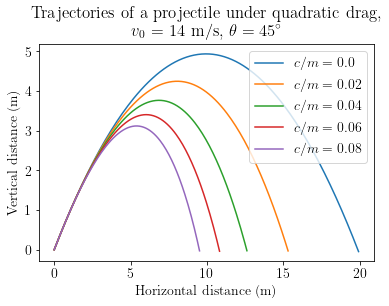

In [6]:
plt.figure()
i = 0
while i < len(xvec):
    plt.plot(xvec[i], yvec[i], label='$c/m = {:.3}$'.format(cvec[i]))
    i = i + 1
plt.title('Trajectories of a projectile under quadratic drag,\n $v_0$ = 14 m/s, $\\theta = {:2d}^\circ$'.format(th))
plt.xlabel('Horizontal distance (m)')
plt.ylabel('Vertical distance (m)')
plt.legend(loc='best')
plt.savefig('quad-drag-trajectories.svg')